# EDA Notebook

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image

## Inspect Images

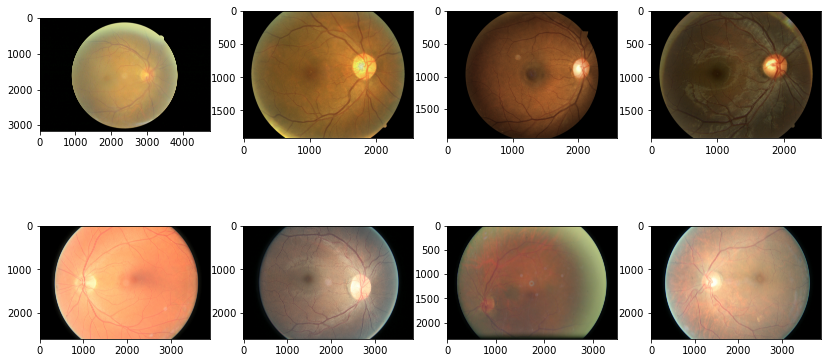

In [2]:
src_path = "./diabetic-retinopathy-detection/Data/train"
sub_class = os.listdir(src_path)

# look at first 8 pictures
fig = plt.figure(figsize=(14,7))
for e in range(len(sub_class[:8])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img)

These are all different sizes! And they all have a different brightness, edges, and coloring. 

## Closer Look at Picture Size Distribution

I'm going to loop through the images in the train folder and plot the picture sizes and find out if the pictures are all in color.

Median Image Sizes: 3888.0 x 2592.0


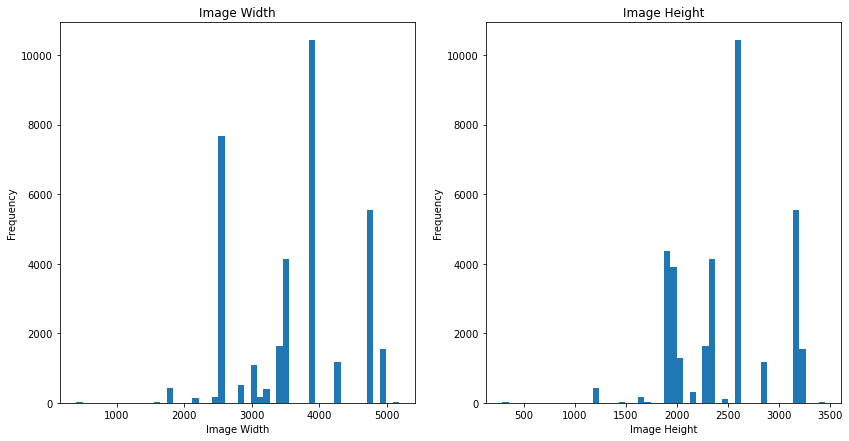

Image modes: {'RGB'}


In [3]:
# create lists to plot
widths = []
heights = []

for img_file in os.listdir(src_path):
    img = Image.open(os.path.join(src_path, img_file))
    width, height = img.size
    widths.append(width)
    heights.append(height)

print('Median Image Sizes:', np.median(widths), 'x', np.median(heights))

# the plot
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].hist(widths, bins=50)
axs[0].set_xlabel('Image Width')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Image Width')
axs[1].hist(heights, bins=50)
axs[1].set_xlabel('Image Height')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Image Height')
plt.show()

# Check the distribution of image modes (black/white vs color)
modes = []

for img_file in os.listdir(src_path):
    img = Image.open(os.path.join(src_path, img_file))
    modes.append(img.mode)

print('Image modes:', set(modes))

We have all kinds of sizes here. And they're all in the thousands which means these photos all have a pretty high resolution. And it looks like they're all in color.

## Target Distribution

In [4]:
# load the csv file that contains the target labels
traindf = pd.read_csv("./diabetic-retinopathy-detection/Data/trainLabels.csv")
traindf.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


Based on the data source, we know that there should be 5 categories based on a scale of 0 - 4:
* 0 - No DR
* 1 - Mild
* 2 - Moderate
* 3 - Severe
* 4 - Proliferative

In [5]:
traindf.level.value_counts(normalize=True, sort=False)

0    0.734783
1    0.069550
2    0.150658
3    0.024853
4    0.020156
Name: level, dtype: float64

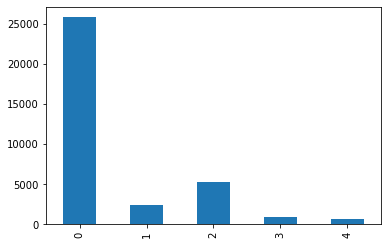

In [6]:
traindf.level.value_counts(sort=False).plot(kind='bar');

Wow, 73% of the data does not contain DR. This means the data has an imbalance. I wonder how many images there are in the training folder.

In [7]:
traindf.shape

(35126, 2)

In [8]:
# check for nulls and dtype
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   35126 non-null  object
 1   level   35126 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 549.0+ KB


In [9]:
traindf.describe()

,level
count,35126.000000
mean,0.526049
std,0.970390
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


Because there are over 35,000 images in the training folder, I think I'm better off creating a small subset of the data - 5,000 images - to train and tune my model before running all the images through it. Just to check, I'm curious what the distribution is with the first 5,000 images.

In [10]:
traindf[:5000].level.value_counts(normalize=True)

0    0.7314
2    0.1576
1    0.0708
3    0.0216
4    0.0186
Name: level, dtype: float64

The first 5,000 images are still imbalanced, but it looks to be pretty representative of all of the data.

In order to help offset some of the balance, I'm going to make the target binary - either DR is present or it is not. I will also need to use some features in the ImageDataGenerator to help supplement the minority category. 

## Begin Modeling
(see "binary_notebook")